# <b> Lab 1 : Source coding </b>

<i> Compte-rendu par Valentin SÉRÉE et Jérémy SERENA [INFO3]</i>

<b> <u> Question 1 </u> </b>

On suppose que nous avons un alphabet A avec les probabilités d'apparition de chaque symbole associé. 
Un vecteur aléatoire avec les symboles de l'alphabet est créé.
Nous pouvons donc calculer l'entropie associée ainsi que l'entropie réelle à partir de l'apparition des symboles dans le vecteur.

<hr>
<div style = "font-family: Courier">
    <p style = "font:font-weight: bold; color: #ffecc5">
        genVecteur
    </p>
    <div style = "padding-left: 15px; color: #b6cff5">
        <b>@in :</b> n = nombre de symboles du vecteur 
        </br>
        <b>@in :</b> Alpha = alphabet dont sont tirés les symboles du vecteur
        </br>
        <b>@out :</b> vect = vecteur formé
    </div>
</div>
<hr><br>
<div>
Cette fonction construit un vecteur aléatoirement en tenant compte de la probabilité d'apparition de chaque symbole dans l'alphabet. Elle retourne donc un vecteur de longueur n constitué des symboles de l'alphabet renseigné.
</div>



In [1]:
import random

def genVecteur(n, Alpha):
    vect = []
    for i in range(n) :
        r = random.randint(0,999999999)
        r = r%100
        val = 0.0
        for cle,valeur in Alpha.items():
            val += valeur*100
            if (r <= val) :
                vect.append (cle)
                break
    return vect 

<hr>
<div style = "font-family: Courier">
    <p style = "font:font-weight: bold; color: #ffecc5">
        entropieTheorique
    </p>
    <div style = "padding-left: 15px; color: #b6cff5">
        <b>@in :</b> Alpha = alphabet dont on veut calculer l'entropie
        </br>
        <b>@out :</b> ent = entropie théorique calculée
    </div>
</div>
<hr><br>
<div>
Cette fonction calcule simplement l'entropie théorique à partir d'un alphabet fourni en entrée.</div>



In [2]:
def entropieTheorique(Alpha):
    # On initialise l'entropie à la valeur neutre pour une somme (soit 0)
    ent = 0
    # On parcourt l'alphabet en récupérant la probabilité de chaque symbole
    for key, proba in Alpha.items():
        # On exclut les valeurs NaN 
        if proba != 0:
            ent = ent + proba*m.log(proba, 2) # On ajoute ce terme à l'entropie
    ent = ent * -1
    return ent

<hr>
<div style = "font-family: Courier">
    <p style = "font:font-weight: bold; color: #ffecc5">
        entropieReelle
    </p>
    <div style = "padding-left: 15px; color: #b6cff5">
        <b>@in :</b> X = vecteur aléatoire avec des symboles tirés de l'alphabet 
        </br>
        <b>@in :</b> Alpha = alphabet dont sont tirés les symboles du vecteur
        </br>
        <b>@out :</b> ent = entropie réelle du vecteur
    </div>
</div>
<hr><br>
<div>
    Cette fonction calcule la probabilité réelle d'apparition de chaque symbole à partir du vecteur fourni en entrée, permettant par conséquent de calculer l'entropie réelle (à partir de ces probabilités calculées grâce au vecteur).
</div>



In [3]:
import math as m

def entropieReelle(X, Alpha):
    # On initialise l'entropie à la valeur neutre pour une somme (soit 0)
    ent = 0
    # On crée un dictionnaire pour construire les probabilités réelles d'apparition de chaque symbole
    dico = {}
    # On initialise le dictionnaire (avant le parcours du vecteur, l'apparition de chaque symbole est 0 fois) 
    for key in Alpha:
        dico[key] = 0
    # On parcourt le vecteur : dès qu'un symbole apparait, on incrémente son nombre d'apparitions
    for i in range (len(X)):
        dico[X[i]]=dico[X[i]]+1
    # On parcourt le dictionnaire d'apparitions réelles de chaque symbole
    for key, valeur in dico.items():
        # On récupère la probabilité (c'est à dire le nb d'apparitions/le nombre de symboles total)
        pReelle = valeur/len(X)
        # On exclut les valeurs NaN 
        if pReelle != 0:
            ent = ent + pReelle*m.log(pReelle, 2) # On ajoute ce terme à l'entropie
    ent = ent * -1
    return ent

<h4> Test des fonctions formées </h4>
On définit un alphabet de test avec 7 termes (de A à G) avec une probabilité d'apparition de chaque terme. Cet alphabet permet d'effectuer les tests ci-après.

In [4]:
# Alphabet de test
# Généré sous la forme d'un dictionnaire Python pour faciliter la manipulation
# Chaque symbole est une clé du dictionnaire tandis que la valeur correspond à sa probabilité
Alphabet = {'A': 0.36, 'B': 0.12, 'C': 0.35, 'D': 0.04, 'E': 0.09, 'F': 0.01, 'G': 0.03}

Calcul de l'entropie théorique :
- on fournit uniquement en paramètre <i>Alphabet</i> (l'alphabet formé ci-dessus)

In [5]:
entTh = str(entropieTheorique(Alphabet))
print("L'entropie théorique de 'Alphabet' est " + entTh + " bits/symbole")

L'entropie théorique de 'Alphabet' est 2.1443965080867726 bits/symbole


Calcul de l'entropie réelle :
- on fournit en paramètres <i>un vecteur de 100 symboles formé à partir de Alphabet</i> et <i>Alphabet</i> (l'alphabet formé ci-dessus)

In [6]:
vecteur = genVecteur(100, Alphabet)
entRe = str(entropieReelle(vecteur, Alphabet))
print("Le vecteur formé est ")
print(vecteur)
print("L'entropie réelle à partir de ce vecteur est " + entRe + " bits/symbole")

Le vecteur formé est 
['C', 'A', 'A', 'A', 'B', 'C', 'A', 'A', 'D', 'C', 'G', 'B', 'C', 'A', 'B', 'A', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'A', 'A', 'A', 'C', 'A', 'E', 'B', 'C', 'A', 'A', 'E', 'C', 'C', 'C', 'C', 'C', 'A', 'C', 'C', 'C', 'C', 'A', 'A', 'A', 'E', 'F', 'A', 'A', 'B', 'C', 'A', 'E', 'A', 'B', 'D', 'C', 'D', 'C', 'C', 'C', 'A', 'A', 'A', 'A', 'A', 'C', 'A', 'B', 'C', 'F', 'E', 'A', 'A', 'B', 'A', 'B', 'A', 'A', 'A', 'A', 'C', 'C', 'C', 'C', 'A', 'A', 'B', 'C', 'E', 'A', 'A', 'A', 'B', 'A', 'C', 'B', 'A']
L'entropie réelle à partir de ce vecteur est 1.9991686867991292 bits/symbole


<b> <u> Question 2 </u> </b>

En créant un alphabet où les symboles ont une fréquence d'apparition théorique équiprobable, on génère un vecteur aléatoire. On peut ensuite calculer son entropie réelle.

In [7]:
# Alphabet de test
# Généré sous la forme d'un dictionnaire Python pour faciliter la manipulation
# Pour simplifier la représentation, nous nous contentrons de deux symboles équiprobables
AlphabetEquiprobable = {'A': 0.5, 'B': 0.5 }

In [8]:
vecteur = genVecteur(100, AlphabetEquiprobable)
entRe = entropieReelle(vecteur, AlphabetEquiprobable)
print("Le vecteur formé est ")
print(vecteur)
print("L'entropie réelle à partir de ce vecteur est " + str(entRe) + " bits/symbole")
ecartRelatif = abs(1-entRe)*100
print("L'écart relatif avec la valeur théorique (1 bit/symb) est de " + str(ecartRelatif)[:5] + "%")


Le vecteur formé est 
['B', 'B', 'A', 'B', 'B', 'B', 'B', 'A', 'A', 'B', 'A', 'B', 'B', 'A', 'A', 'B', 'B', 'B', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'A', 'B', 'B', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'A', 'A', 'A', 'B', 'A', 'A', 'A', 'A', 'B', 'A', 'B', 'B', 'A', 'B', 'B', 'A', 'B', 'B', 'A', 'B', 'B', 'B', 'A', 'B', 'A', 'B', 'B', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'A', 'A', 'B', 'B', 'A', 'B', 'A', 'A', 'A', 'A', 'B', 'A', 'B', 'A', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B']
L'entropie réelle à partir de ce vecteur est 0.9953784388202258 bits/symbole
L'écart relatif avec la valeur théorique (1 bit/symb) est de 0.462%


<b> <u> Question 3 </u> </b>

Prenons un alphabet à 2 symboles où p(X=0) = a (par conséquent, p(X=1) = 1-a). 
Il est pertinent de s'intéresser non seulement aux variations de l'entropie réelle en fonction de a mais également en fonction.

<hr>
<div style = "font-family: Courier">
    <p style = "font:font-weight: bold; color: #ffecc5">
        affichage
    </p>
    <div style = "padding-left: 15px; color: #b6cff5">
        <b>@in :</b> n = nombre de valeurs de a dessinées 
    </div>
</div>
<hr><br>
<div>
Cette fonction gère l'affichage conjoint de l'entropie théorique en fonction de a ainsi que celle de l'entropie réelle en fonction de a. Elle utilise le module pyplot de matplotlib.
</div>



In [9]:
import matplotlib.pyplot as plt
import numpy as np

def affichage(n):
    Lx = np.linspace(0.001,0.999,n)
    LyR=[]
    LyT=[]
    for a in Lx:
        Alphabet3 = {'0': a, '1': 1-a}
        LyT.append(-(a*m.log(a,2) + (1-a)*m.log(1-a,2)))
        LyR.append(entropieReelle(genVecteur(100, Alphabet3), Alphabet3))
    plt.plot(Lx, LyR)
    plt.plot(Lx, LyT)
    axes = {'family': 'DejaVu Sans', 'size': 14}
    reelle = {'family': 'DejaVu Sans', 'color' : '#1f76b4', 'size': 12}
    theorique = {'family': 'DejaVu Sans', 'color' : '#e77d1f', 'size': 12}
    plt.xlabel("a = P[X=0]", axes)
    plt.ylabel("Entropie (bit/symb)", axes)
    plt.title("Entropie réelle", reelle, loc="right")
    plt.title("Entropie théorique", theorique, loc="left")
    plt.show()

<h4> Test de la fonction formée </h4>
On affiche 1000 valeurs de a (prises entre 0 et 1) afin d'avoir une courbe la plus précise possible. 
Comme précisé, la courbe orange représente la courbe théorique tandis que la bleue est la courbe réelle. On note que la courbe réelle obtenue est cohérente avec la courbe théorique.

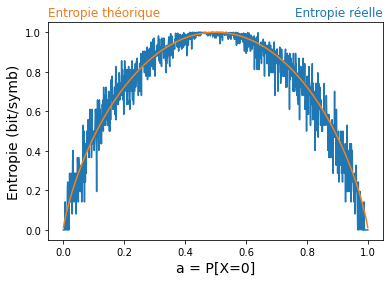

In [10]:
affichage(1000)

<b> <u> Question 4 </u> </b>

Considérons une source discrète sans mémoire avec un alphabet binaire. <i>(voir sujet)</i>

$$\pi = \begin{pmatrix} p_{00} & p_{10} \\ p_{01} & p_{11} \end{pmatrix} $$

Pour connaître p<sub>0</sub> et p<sub>1</sub>, calculons : 
$$ P\pi = P $$
où : 
$$ P = \begin{bmatrix} p(x_k = 0) & p(x_k = 1)\end{bmatrix} = \begin{bmatrix} p_0 & p_1\end{bmatrix} $$
          
Donc : 
$$ \begin{bmatrix} p_0 & p_1\end{bmatrix} = \begin{bmatrix} p_0 \times p_{00} + p_1 \times p_{01} & p_0 \times p_{10} + p_1 \times p_{11} \end{bmatrix}$$

On a donc (en régime stationnaire) : 
$$p_0 = p_0 \times p_{00} + p_1 \times p_{01} $$

Or : $$ p_1 = 1 - p_0 $$

On obtient donc : <br>
$$ p_0 \times p_{00} + (1 - p_0) \times p_{01} = p_0 $$
$$ p_0 \times (p_{00} - 1 - p_{01}) = - p_{01} $$
Ce qui donne :
$$ p_0 = \frac{p_{01}}{1 + p_{01} - p_{00}} $$
$$ p_1 = \frac{1 - p_{00}}{1 + p_{01} - p_{00}} $$
          

On peut ainsi calculer l'entropie H(x<sub>k</sub>) de cette source :
$$ \begin{align}
H(x_k) & = \sum H(x_k |  x_{k-1}) \times p(x_{k-1}) \\
            & = H(x_k | x_{k-1} = 0) \times p(x_{k-1} = 0) + H(x_k | x_{k-1} = 1) \times p(x_{k-1} = 1) \\
            & = H(x_k | x_{k-1} = 0) \times p_0 + H(x_k | x_{k-1} = 1) \times p_1 \\
            & = - [ p(x_k = 0 | x_{k-1} = 0) \times log_2(p(x_k = 0 | x_{k-1} =0)) + p(x_k = 1 | x_{k-1} = 0) \times log_2(p(x_k = 1 | x_{k-1} =0))] \times p_0 \\
            & - [ p(x_k = 0 | x_{k-1} = 1) \times log_2(p(x_k = 0 | x_{k-1} =1)) + p(x_k = 1 | x_{k-1} = 1) \times log_2(p(x_k = 1 | x_{k-1} =1))] \times p_1
\end{align} $$ 

On aboutit ainsi à :
$$ H(x_k) = - [p_{00} \times log_2(p_{00}) + p_{01} \times log_2(p_{01})] \times p_0 - [p_{10} \times log_2(p_{10}) + p_{11} \times log_2(p_{11})] \times p_1 $$

<b> <u> Question 5 </u> </b>

Grâce aux résultats précédents, nous souhaitons calculer l'entropie d'une photographie (en l'occurence ici un document écrit). Pour cela, nous devons utiliser la matrice de transition à partir des pixels de cette image.

<hr>
<div style = "font-family: Courier">
    <p style = "font:font-weight: bold; color: #ffecc5">
        matriceTransition
    </p>
    <div style = "padding-left: 15px; color: #b6cff5">
        <b>@in :</b> path = chemin vers l'image 
        </br>
        <b>@out :</b> P = matrice de transition de l'image fournie
    </div>
</div>
<hr><br>
<div>
    Cette fonction va calculer les valeurs équivalentes à p<sub>00</sub>, p<sub>10</sub>, p<sub>01</sub> et p<sub>11</sub> (constituant la matrice de transition de l'image)
</div>



In [11]:
from PIL import Image as Img
import numpy as np

def matriceTransition(path):
    im = Img.open(path) # On récupère l'image fournie
    imgData = np.asarray(im) # On la transforme en tableau numpy
    nN = 0 # nombre de pixels noir suivis par un noir
    bN = 0 # nombre de pixels blancs suivis par un noir
    for i in range(len(imgData)):
        for j in range(len(imgData[0])):
            if imgData[i][j] == 0 and imgData[(i+1)%len(imgData)][j] == 0: # si on a un pixel noir et que le pixel "proche" associé est noir
                nN += 1 # on augmente le compteur de pixel noir associé à un pixel noir
            if imgData[i][j] == 1 and imgData[(i+1)%len(imgData)][j] == 0: # si on a un pixel blanc et que le pixel "proche" associé est noir
                bN += 1 # on augmente le compteur de pixel blanc associé à un pixel noir
    nbPixel = len(imgData)*len(imgData[0]) # on calcule le nombre de pixels total
    P = [[nN/nbPixel, 1-(nN/nbPixel)], [bN/nbPixel, 1-(bN/nbPixel)]]
    return P

Nous pouvons désormais récupérer les composants de la matrice pour, dans un premier temps, calculer p<sub>0</sub> et p<sub>1</sub>, ce qui nous permettra dans un second temps de calculer l'entropie en considérant une source sans et avec mémoire.

In [12]:
# Nous appliquons la fonction ci-dessus pour récupérer les composants de la matrice de transition de l'image
[[p00, p10], [p01, p11]] = matriceTransition(r"./image.png")

# Cela nous permet de calculer les deux termes p0 et p1
p0 = p01/(1+p01-p00)
p1 = (1-p00)/(1+p01-p00)

# On peut appliquer la formule vue en question 4 pour la source avec mémoire
Hmem = -(p00*m.log(p00,2)+p01*m.log(p01,2))*p0 - (p10*m.log(p10,2)+p11*m.log(p11,2))*p1

# On peut également calculer l'entropie de cette même source sans mémoire
H = -p0*m.log(p0,2) - p1*m.log(p1,2)

print("L'entropie H(xk) est " + str(Hmem)[:5] + " bit/symbole")
print("L'entropie de la source correspondante sans mémoire est " + str(H)[0:5] + " bit/symbole")

L'entropie H(xk) est 0.071 bit/symbole
L'entropie de la source correspondante sans mémoire est 0.084 bit/symbole


On remarque que l'entropie de la source considérée sans mémoire est plus importante que cette même source avec mémoire. Cela s'explique par le fait que deux pixels accolés ne sont pas totalement indépendants.

La longueur moyenne est de 1 bit/symbole. 
L'efficacité, calculée comme le rapport de l'entropie par la longueur moyenne, est donc de 7.1% pour la source sans mémoire. Cette très faible efficacité s'explique par le fait que le codage n'est pas optimal : plusieurs bits identiques accolés peuvent être codés simultanément.

<b> <u> Question 6 </u> </b>

Nous allons réaliser un encodeur basé sur la méthode RLE pour une telle source. 

<hr>
<div style = "font-family: Courier">
    <p style = "font:font-weight: bold; color: #ffecc5">
        sourceEncoder
    </p>
    <div style = "padding-left: 15px; color: #b6cff5">
        <b>@in :</b> path = chemin vers l'image 
        </br>
        <b>@out :</b> res = encodage
    </div>
</div>
<hr><br>
<div>
    Cette fonction encode selon la méthode RLE l'image fournie. En sortie, la fonction ressort une liste où chaque terme est une chaîne de caractères représentant une ligne de l'image. Le bit de la couleur du pixel est ici écrite en N/B (au lieu de 0/1) pour des soucis de lisibilité (mais serait facilement retranscriptible en changeant ce paramètre). Le nombre de pixels de la couleur sont également écrits dans une base 10 (et non une base 2) pour des soucis de lisibilité (facilement retranscriptible avec la fonction bin() Python). 
</div>



In [13]:
def sourceEncoder(path):
    im = Img.open(path) # On récupère l'image
    imgData = np.asarray(im) # On la transforme en tableau numpy
    res = []
    for i in range(len(imgData)): # On parcourt toute l'image
        colorActual = "B"
        string_row = ""
        nombrePixel = 0
        for j in range(len(imgData[0])):
            if imgData[i][j] == 0 :#si pixel noir
                if colorActual == "N" :# si série de pixels noirs
                    nombrePixel += 1
                else :# si série de pixels blancs
                    string = colorActual + ' ' + str(nombrePixel) + ' ; '
                    string_row += string
                    nombrePixel = 1
                    colorActual = "N"
            else :# si pixel blanc
                if colorActual == "B" :# si série de pixels blancs
                    nombrePixel += 1
                else :# si série de pixels noirs
                    string = colorActual + ' ' + str(nombrePixel) + ' ; '
                    string_row += string
                    nombrePixel = 1
                    colorActual = "B"
        string = colorActual + str(nombrePixel) 
        string_row += string
        res.append(string_row)
        nombrePixel = 0
        colorActual = "B"
    return res

<h4> Test de la fonction formée </h4>
On affiche une partie des lignes de notre image encodée (par soucis de concision).

In [24]:
encodage = sourceEncoder(r"./image.png")
print("Encodage de la ligne 1400")
print(encodage[1400])

Encodage de la ligne 1400
B 450 ; N 4 ; B 11 ; N 3 ; B 18 ; N 4 ; B 8 ; N 3 ; B 8 ; N 3 ; B 5 ; N 3 ; B 27 ; N 3 ; B 8 ; N 3 ; B 7 ; N 3 ; B 8 ; N 3 ; B 7 ; N 3 ; B 8 ; N 4 ; B 7 ; N 4 ; B 6 ; N 3 ; B 9 ; N 4 ; B 4 ; N 2 ; B 18 ; N 3 ; B 18 ; N 4 ; B 10 ; N 4 ; B 7 ; N 3 ; B 19 ; N 3 ; B 8 ; N 3 ; B 8 ; N 3 ; B 5 ; N 3 ; B 17 ; N 6 ; B 10 ; N 6 ; B 16 ; N 6 ; B 7 ; N 3 ; B 8 ; N 3 ; B 5 ; N 3 ; B 17 ; N 6 ; B 22 ; N 3 ; B 7 ; N 4 ; B 7 ; N 4 ; B 16 ; N 3 ; B 8 ; N 4 ; B 7 ; N 4 ; B 4 ; N 3 ; B 27 ; N 6 ; B 9 ; N 3 ; B 17 ; N 3 ; B 20 ; N 3 ; B 6 ; N 7 ; B 21 ; N 4 ; B 8 ; N 3 ; B 8 ; N 3 ; B 8 ; N 3 ; B 8 ; N 3 ; B 7 ; N 3 ; B 7 ; N 3 ; B 27 ; N 3 ; B 8 ; N 3 ; B 8 ; N 3 ; B 5 ; N 3 ; B 18 ; N 3 ; B 8 ; N 3 ; B 16 ; N 4 ; B 8 ; N 3 ; B 8 ; N 3 ; B 8 ; N 3 ; B 6 ; N 7 ; B 20 ; N 4 ; B 7 ; N 4 ; B 6 ; N 3 ; B 8 ; N 3 ; B 7 ; N 4 ; B 7 ; N 4 ; B 8 ; N 3 ; B 6 ; N 4 ; B 9 ; N 4 ; B 3 ; N 3 ; B 17 ; N 4 ; B 18 ; N 3 ; B 10 ; N 4 ; B 5 ; N 4 ; B 25 ; N 7 ; B 6 ; N 4 ; B 7 ; N 4 ; B 8 ; N 3 ;